# 7.4 합성곱 신경망과 숫자 이미지 인식

# 7.4.1 MNIST data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('./sample_data/mnist_train_small.csv', header=None)
data  = np.array(data)

In [ ]:
data

array([[6, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

In [ ]:
data.shape

(20000, 785)

In [ ]:
data[0,:]

array([  6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  24,  67,  67,  18,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 131, 252, 252,  66,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 159, 250, 23

In [ ]:
x_train = data[:,1:]  # 이미지 데이터
# 28 x 28 이미지의 픽셀 정보가 1차원상에 나열되어 있음
y_train = data[:,0]   # 정답 정보(0~9)

In [ ]:
x_train.shape

(20000, 784)

In [ ]:
x_train = x_train.reshape(-1, 28, 28) # 784 = 28 x 28

In [ ]:
x_train.shape

(20000, 28, 28)

In [ ]:
print(x_train[0,:,:])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  24  67  67  18   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 131 252 252  66   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 159 250 232  30  32   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  15 222 252 108   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 147 252 183   5   0   0   0   

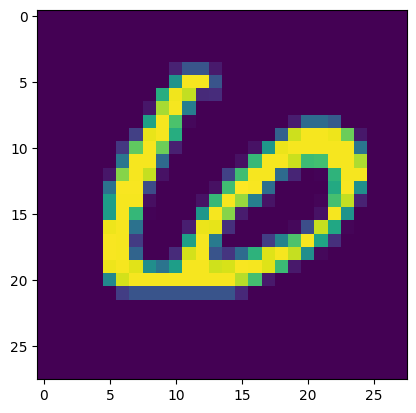

In [ ]:
plt.imshow(x_train[0,:,:])

In [ ]:
y_train[0]

6

# 7.4.2 딥러닝 모델 생성과 학습

In [ ]:
import tensorflow.keras as keras
from keras import layers
from keras import optimizers

In [ ]:
y_train = keras.utils.to_categorical(y_train)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# 2차원 합성곱층을 사용하기 위해서
# 입력 데이터(x_train)의 이미지 데이터 부분을을(28x28) 3차원에 맞춰야 함
# 이미지 데이터 - 3차원(R,G,B)
x_train = np.expand_dims(x_train,-1)  # 4차원으로 수정

In [ ]:
x_train.shape

(20000, 28, 28, 1)

In [ ]:
x_train[0,:,:]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [ ]:
# 정규화
x_train = x_train/255

In [ ]:
from keras import Sequential

In [ ]:
model = Sequential()
# 1) 합성곱 생성
# model.add(layers.Conv2D(filters=8, kernel_size=3, input_shape=(28,28,1),activation='relu'))
# model.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
# 2) padding 추가 -> Shape 유지
model.add(layers.Conv2D(filters=8, kernel_size=3, input_shape=(28,28,1),activation='relu', padding='same'))
model.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(strides=2, padding='same')) # stride = 2 -> 이미지 크기 1/2
model.add(layers.Flatten())
model.add(layers.Dense(units=10, activation='softmax'))
# 원-핫 인코딩을 통해 이미지가 범주형 데이터가 되었음 -> softmax 사용

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.
              RMSprop(learning_rate=0.001), metrics=['accuracy'])
              # learning_rate 낮추면 -> 세밀한 분석 가능, 시간 오래 걸림, local minimum 빠질 위험

In [ ]:
# 1)
model.summary()
# Flatten = (max_pooling2d_3) 12 x 12 x 16 = 2304

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 10)                31370     
                                                                 
Total params: 32,618
Trainable params: 32,618
Non-trainable params: 0
____________________________________________________

In [ ]:
# 2) padding 추가 한 경우
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                31370     
                                                                 
Total params: 32,618
Trainable params: 32,618
Non-trainable params: 0
__________________________________________________

In [ ]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3)
# val_accuracy 이 더 중요쓰 ......

Epoch 1/10
219/219 [==============================] - 2s 7ms/step - loss: 0.4674 - accuracy: 0.8634 - val_loss: 0.2395 - val_accuracy: 0.9328
Epoch 2/10
219/219 [==============================] - 1s 5ms/step - loss: 0.1871 - accuracy: 0.9432 - val_loss: 0.1871 - val_accuracy: 0.9455
Epoch 3/10
219/219 [==============================] - 1s 5ms/step - loss: 0.1226 - accuracy: 0.9631 - val_loss: 0.1251 - val_accuracy: 0.9622
Epoch 4/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0921 - accuracy: 0.9726 - val_loss: 0.1007 - val_accuracy: 0.9715
Epoch 5/10
219/219 [==============================] - 2s 7ms/step - loss: 0.0738 - accuracy: 0.9784 - val_loss: 0.0868 - val_accuracy: 0.9752
Epoch 6/10
219/219 [==============================] - 2s 7ms/step - loss: 0.0636 - accuracy: 0.9827 - val_loss: 0.0797 - val_accuracy: 0.9758
Epoch 7/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0519 - accuracy: 0.9858 - val_loss: 0.0822 - val_accuracy: 0.9747
Epoch 

In [ ]:
def drawHistory(hist):
  fig = plt.figure(figsize=(15,10))   # 10x15 크기의 figure 생성
  loss_ax = plt.gca()                 # figure의 기본 축 가져오기
  acc_ax = loss_ax.twinx()            # 축을 1개 더 추가

  # 손실 변화 양상을 그래프로 표시
  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='lower left')

  # 정확도 변화 양상을 그래프로 표시
  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='upper left')

  plt.show()

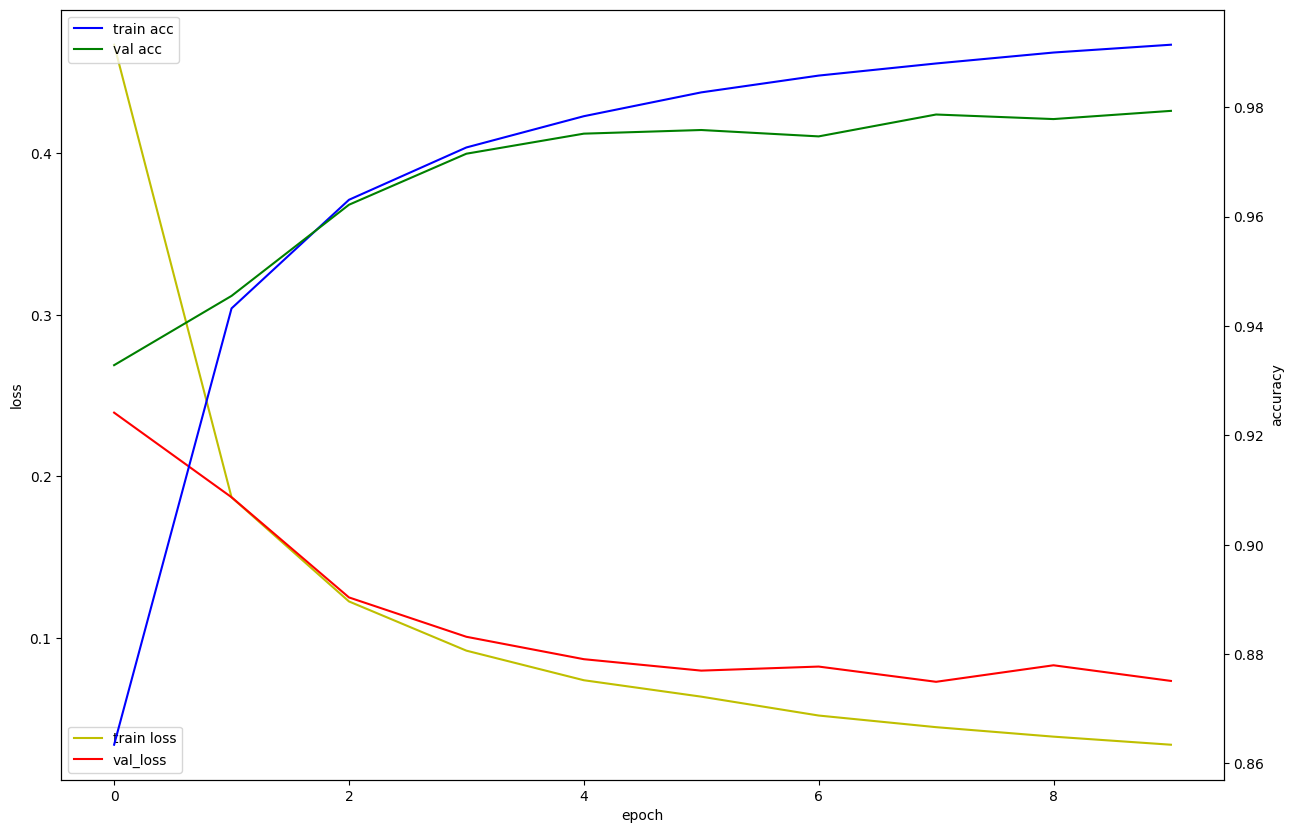

In [ ]:
drawHistory(hist)

# 7.4.3 테스트

In [ ]:
data = pd.read_csv('/content/sample_data/mnist_test.csv', header=None)
data = np.array(data)

In [ ]:
x_test = data[:,1:]
y_test = data[:,0]
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
x_test = x_test / 255

In [ ]:
o = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
o.shape

(10000, 10)

In [ ]:
o[0,:]

array([3.7732152e-13, 1.1855021e-14, 8.7580845e-11, 7.3016871e-08,
       5.9989669e-16, 1.4327747e-12, 9.0783395e-21, 9.9999988e-01,
       2.2909952e-09, 7.6220869e-10], dtype=float32)

In [ ]:
y_test[0]

7

In [ ]:
np.argmax(o,-1)

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
o = np.argmax(o, -1)

In [ ]:
sum(y_test == o) / len(y_test)

0.9799

In [ ]:
o

array([7, 2, 1, ..., 4, 5, 6])

# 연습문제 4

In [ ]:
# confusion matrix를 나타내는 변수 생성. 정수형 타입으로 선언
c_matrix = np.zeros([10,10]).astype(np.int_)

# for i in range(y_test.shape[0]):  # 모든 테스트 데이터에range(len(y_test))
for i, y in enumerate(y_test):
# for i, idx_target in enumerate(y_test):
  idx_target = y_test[i]          # 타깃 정보(세로축)
  idx_output = o[i]               # 출력 정보(가로축)

  # 해당 위치의 c_matrix 값을 1 증가
  c_matrix[idx_target, idx_output] += 1

print(c_matrix)

[[ 971    1    1    0    0    1    2    2    1    1]
 [   0 1130    3    2    0    0    0    0    0    0]
 [   0   12 1000    5    1    0    1   11    2    0]
 [   0    0    3  991    0    9    0    6    1    0]
 [   2    0    1    0  953    0    3    6    2   15]
 [   2    0    0    2    0  884    1    2    0    1]
 [   3    3    0    0    6    2  943    0    1    0]
 [   0    3    6    3    0    0    0 1014    2    0]
 [   7    0    3    4    1    3    2   12  939    3]
 [   3    6    1    3    3    2    0   14    3  974]]


In [ ]:
c_matrix[0,0] / sum(c_matrix[:,0])

0.9827935222672065

In [ ]:
p = np.zeros(10,)
r = np.zeros(10,)
f = np.zeros(10,)
for i in range(10):
  p[i] = c_matrix[i,i] / sum(c_matrix[:,i])
  r[i] = c_matrix[i,i] / sum(c_matrix[i,:])
  f[i] = 2 / (1/p[i] + 1/r[i])

In [ ]:
np.mean(f)

0.9799567211282687

In [ ]:
f

array([0.98678862, 0.98689956, 0.97560976, 0.98118812, 0.97944502,
       0.98605689, 0.98743455, 0.96801909, 0.97558442, 0.97254119])

In [ ]:
# 대각 행렬 np.diag()
acc = np.sum(np.diag(c_matrix)) / np.sum(c_matrix[:])

# 나

In [ ]:
y_test # target

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
o # 실제 결과

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
confusion_mat = np.zeros((10,10)).astype(np.int_)

In [ ]:
for target in y_test:
  for test in o:
    if (target == test):
      confusion_mat[target,test] += 1
print(confusion_mat)

[[ 968240       0       0       0       0       0       0       0       0
        0]
 [      0 1310925       0       0       0       0       0       0       0
        0]
 [      0       0 1050576       0       0       0       0       0       0
        0]
 [      0       0       0 1020100       0       0       0       0       0
        0]
 [      0       0       0       0  946648       0       0       0       0
        0]
 [      0       0       0       0       0  803692       0       0       0
        0]
 [      0       0       0       0       0       0  912016       0       0
        0]
 [      0       0       0       0       0       0       0 1096876       0
        0]
 [      0       0       0       0       0       0       0       0  926274
        0]
 [      0       0       0       0       0       0       0       0       0
  1002946]]


In [ ]:
'''
Acc = sum() / len(c_matrix)
Precision = TP / TP + PP
Recall = TP / TP + FN
F1 score =
'''
TP = list()
PP = list()
FN = list()
Pred = list()
Recall = list()

In [ ]:
for i, j in enumerate(c_matrix):
  TP.append(c_matrix[i,i])
  PP.append(sum(c_matrix[:,i]) - c_matrix[i,i])
  FN.append(sum(c_matrix[i,:]) - TP[i])
  Pred.append(TP[i] / (TP[i]+PP[i]))
  Recall.append(TP[i] / (TP[i]+FN[i]))

# confusion matrix

[w3schools](https://www.w3schools.com/python/python_ml_confusion_matrix.asp)
[blog](https://bskyvision.com/entry/python-scikit-learn%EC%9D%98-confusion-matrix-%ED%95%B4%EC%84%9D%ED%95%98%EA%B8%B0)

In [ ]:
from sklearn import metrics

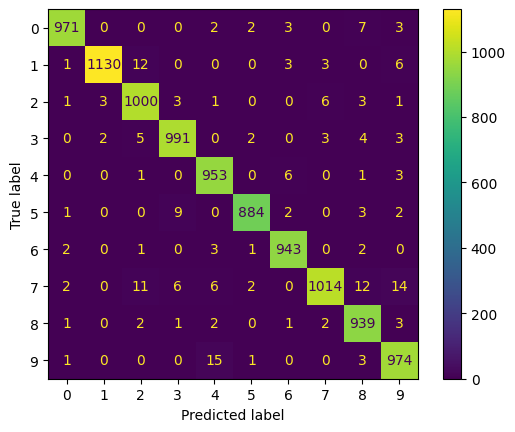

In [ ]:
confusion_matrix = metrics.confusion_matrix(o, y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()